<a href="https://colab.research.google.com/github/Naakul24/TAIRP/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()


Saving SBIN.NS.csv to SBIN.NS.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/SBIN.NS.csv')
print(df.head())
print(df.tail())

         Date       Open       High        Low      Close  Adj Close  \
0  2001-01-01  18.261845  22.361443  18.030684  21.748156  15.600823   
1  2001-02-01  21.616062  24.710810  20.474401  23.163437  16.616062   
2  2001-03-01  23.493668  26.031740  18.879852  18.969486  13.607577   
3  2001-04-01  18.776064  21.417923  17.488157  19.771479  14.182875   
4  2001-05-01  19.771479  23.955994  19.771479  20.898987  14.991683   

      Volume  
0  601155908  
1  717034369  
2  344625603  
3  137717507  
4  226046443  
           Date        Open        High         Low       Close   Adj Close  \
271  2023-08-01  620.200012  620.849976  554.000000  561.349976  561.349976   
272  2023-09-01  562.700012  608.400024  562.099976  598.549988  598.549988   
273  2023-10-01  598.549988  604.900024  543.200012  565.549988  565.549988   
274  2023-11-01  566.250000  582.599976  563.849976  581.349976  581.349976   
275  2023-11-13  581.000000  582.500000  575.200012  581.349976  581.349976   

  

In [3]:
df =df.drop(['Adj Close'], axis=1)

In [4]:
print(df.head())

         Date       Open       High        Low      Close     Volume
0  2001-01-01  18.261845  22.361443  18.030684  21.748156  601155908
1  2001-02-01  21.616062  24.710810  20.474401  23.163437  717034369
2  2001-03-01  23.493668  26.031740  18.879852  18.969486  344625603
3  2001-04-01  18.776064  21.417923  17.488157  19.771479  137717507
4  2001-05-01  19.771479  23.955994  19.771479  20.898987  226046443


In [5]:
df['Volume'] = (df['Volume'] / 10000).round(2)
df['Monthly_Return'] = (df['Close'].pct_change() * 100).round(2)

In [6]:
print(df.head())
print(df.tail())

         Date       Open       High        Low      Close    Volume  \
0  2001-01-01  18.261845  22.361443  18.030684  21.748156  60115.59   
1  2001-02-01  21.616062  24.710810  20.474401  23.163437  71703.44   
2  2001-03-01  23.493668  26.031740  18.879852  18.969486  34462.56   
3  2001-04-01  18.776064  21.417923  17.488157  19.771479  13771.75   
4  2001-05-01  19.771479  23.955994  19.771479  20.898987  22604.64   

   Monthly_Return  
0             NaN  
1            6.51  
2          -18.11  
3            4.23  
4            5.70  
           Date        Open        High         Low       Close    Volume  \
271  2023-08-01  620.200012  620.849976  554.000000  561.349976  46250.95   
272  2023-09-01  562.700012  608.400024  562.099976  598.549988  30797.21   
273  2023-10-01  598.549988  604.900024  543.200012  565.549988  25840.19   
274  2023-11-01  566.250000  582.599976  563.849976  581.349976  11644.25   
275  2023-11-13  581.000000  582.500000  575.200012  581.349976   11

In [7]:
df['Open'] = df['Open'].round(2)
df['High'] = df['High'].round(2)
df['Low'] = df['Low'].round(2)
df['Close'] = df['Close'].round(2)

In [8]:
print(df.tail())

           Date    Open    High     Low   Close    Volume  Monthly_Return
271  2023-08-01  620.20  620.85  554.00  561.35  46250.95           -9.49
272  2023-09-01  562.70  608.40  562.10  598.55  30797.21            6.63
273  2023-10-01  598.55  604.90  543.20  565.55  25840.19           -5.51
274  2023-11-01  566.25  582.60  563.85  581.35  11644.25            2.79
275  2023-11-13  581.00  582.50  575.20  581.35   1127.89            0.00


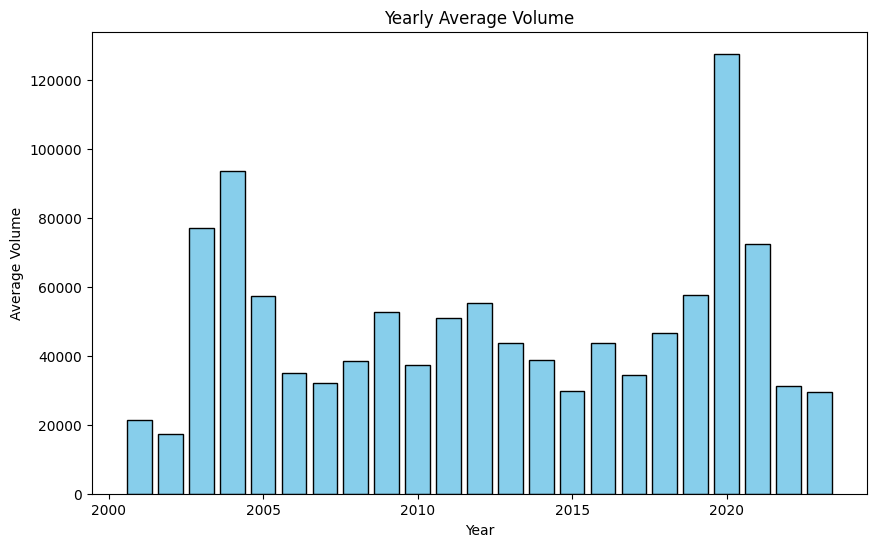

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
average_volume_per_year = df.groupby('year')['Volume'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_volume_per_year['year'], average_volume_per_year['Volume'], color='skyblue', edgecolor='black')
plt.title('Yearly Average Volume')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.show()


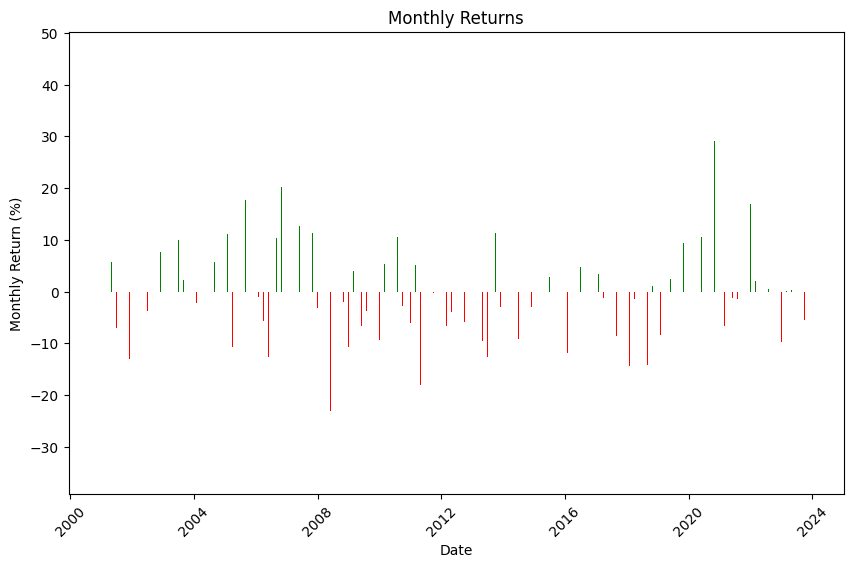

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Monthly_Return'], color=['green' if x > 0 else 'red' for x in df['Monthly_Return']], width = 3)
plt.title('Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Monthly Return (%)')
plt.xticks(rotation=45)
plt.show()

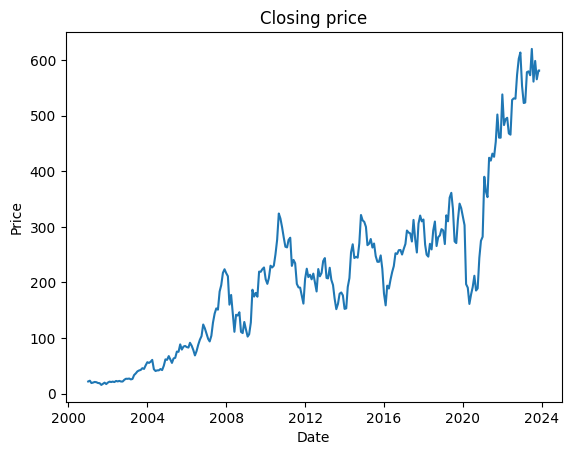

In [11]:
plt.plot(df['Date'],df['Close'])
plt.title('Closing price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [12]:
import plotly.graph_objects as go
df['year'] = df['Date'].dt.year
df_yearly = df.groupby('year').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'}).reset_index()
fig = go.Figure()

for index, row in df_yearly.iterrows():
    fig.add_trace(go.Candlestick(x=[row['year']], open=[row['Open']], high=[row['High']], low=[row['Low']], close=[row['Close']],
                    name=str(row['year'])))

fig.update_layout(title='Yearly Candlestick Chart',
                  xaxis_title='Year',
                  yaxis_title='Stock Price',
                  xaxis=dict(type='category'),
                  xaxis_rangeslider_visible=False)

fig.show()

In [38]:
uploaded = files.upload()

Saving NIFTY 50_Data.csv to NIFTY 50_Data (1).csv


In [37]:
uploaded = files.upload()

Saving Gold.csv to Gold (1).csv


In [39]:
df1 = pd.read_csv('/content/NIFTY 50_Data.csv')
df2 = pd.read_csv('/content/Gold.csv')
print(df1.head())
print(df2.head())

  Date        Open    High     Low      Close 
0  01-Jan-01  1263.5  1276.15  1250.65  1254.3
1  01-Feb-01  1371.5  1373.50  1340.95  1359.1
2  02-Feb-01  1359.1  1384.90  1355.30  1378.8
3  05-Feb-01  1378.8  1392.15  1373.45  1382.6
4  06-Feb-01  1382.7  1395.40  1382.70  1387.1
   year  price
0  2001  4300 
1  2002  4990 
2  2003  5600 
3  2004  5850 
4  2005  7000 


In [40]:
df1['Date'] = pd.to_datetime(df1['Date'])
first_working_day = df1.groupby(df1['Date'].dt.to_period("M"))['Date'].idxmin()
df1 = df1.loc[first_working_day]
print(df1.tail(10))

     Date        Open      High      Low       Close   
5472 2023-02-01  17811.60  17972.20  17353.40  17616.30
5492 2023-03-01  17360.10  17467.75  17345.25  17450.90
5513 2023-04-03  17427.95  17428.05  17312.75  17398.05
5530 2023-05-02  18124.80  18180.25  18101.75  18147.65
5552 2023-06-01  18579.40  18580.30  18464.55  18487.75
5573 2023-07-03  19246.50  19345.10  19234.40  19322.55
5594 2023-08-01  19784.00  19795.60  19704.60  19733.55
5616 2023-09-01  19258.15  19458.55  19255.70  19435.30
5636 2023-10-03  19622.40  19623.20  19479.65  19528.75
5656 2023-11-01  19064.05  19096.05  18973.70  18989.15


In [42]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['month_year'] = df1['Date'].dt.strftime('%m-%Y')
print(df1.tail(10))

     Date        Open      High      Low       Close    month_year
5472 2023-02-01  17811.60  17972.20  17353.40  17616.30  02-2023  
5492 2023-03-01  17360.10  17467.75  17345.25  17450.90  03-2023  
5513 2023-04-03  17427.95  17428.05  17312.75  17398.05  04-2023  
5530 2023-05-02  18124.80  18180.25  18101.75  18147.65  05-2023  
5552 2023-06-01  18579.40  18580.30  18464.55  18487.75  06-2023  
5573 2023-07-03  19246.50  19345.10  19234.40  19322.55  07-2023  
5594 2023-08-01  19784.00  19795.60  19704.60  19733.55  08-2023  
5616 2023-09-01  19258.15  19458.55  19255.70  19435.30  09-2023  
5636 2023-10-03  19622.40  19623.20  19479.65  19528.75  10-2023  
5656 2023-11-01  19064.05  19096.05  18973.70  18989.15  11-2023  


In [57]:
# df1 = df1.drop(["Date"], axis = 1)
print(df.head())
print(df1.head())
print(df2.head())

  Date        Open   High   Low    close  Volume    Monthly_Return  year
0 2001-01-01  18.26  22.36  18.03  21.75  60115.59    NaN           2001
1 2001-02-01  21.62  24.71  20.47  23.16  71703.44   6.51           2001
2 2001-03-01  23.49  26.03  18.88  18.97  34462.56 -18.11           2001
3 2001-04-01  18.78  21.42  17.49  19.77  13771.75   4.23           2001
4 2001-05-01  19.77  23.96  19.77  20.90  22604.64   5.70           2001
    Open     High     Low      Close  month_year Date        year
0   1263.50  1276.15  1250.65  1254.3 2001-01-01 2001-01-01  2001
1   1371.50  1373.50  1340.95  1359.1 2001-02-01 2001-02-01  2001
21  1351.75  1399.55  1345.05  1358.0 2001-03-01 2001-03-01  2001
42  1148.10  1148.10  1094.35  1138.1 2001-04-01 2001-04-01  2001
61  1125.45  1150.65  1125.25  1137.2 2001-05-01 2001-05-01  2001
   year  price
0  2001  4300 
1  2002  4990 
2  2003  5600 
3  2004  5850 
4  2005  7000 


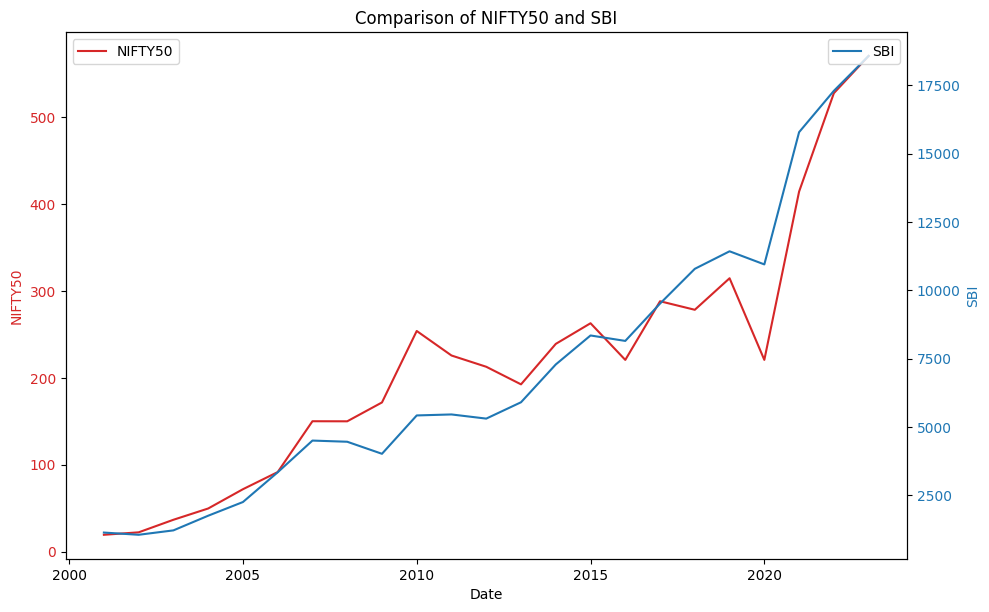

In [63]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['year'] = df['Date'].dt.year
average_price_per_year_sbi = df.groupby('year')['close'].mean().reset_index()

df1['Date'] = pd.to_datetime(df1['month_year'], format='%m-%Y')
df1['year'] = df1['Date'].dt.year
average_price_per_year_nifty = df1.groupby('year')['Close'].mean().reset_index()


df_combined = pd.merge(average_price_per_year_sbi, average_price_per_year_nifty, on='year', how='outer')

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('NIFTY50', color=color)
ax1.plot(df_combined['year'], df_combined['close'], color=color, label='NIFTY50')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('SBI', color=color)
ax2.plot(df_combined['year'], df_combined['Close'], color=color, label='SBI')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparison of NIFTY50 and SBI')
ax1.legend()
ax2.legend(loc='upper right')
plt.show()